In [1]:
#import necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read data

In [2]:
df = pd.read_csv('flights.txt', sep='|')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,54548800,20020101,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,DallasTX: Dallas Love Field,Dallas,TX,Texas,1425,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles
1,55872300,20020101,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas,1130,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles
2,54388800,20020101,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas CityMO: Kansas City International,Kansas City,MO,Missouri,1215,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles
3,54486500,20020101,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,Las VegasNV: McCarran International,Las Vegas,NV,Nevada,1925,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles
4,55878700,20020103,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas,1455,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles


In [5]:
df.columns

Index(['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'AIRLINENAME', 'TAILNUM',
       'FLIGHTNUM', 'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME',
       'ORIGINSTATE', 'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME',
       'DESTCITYNAME', 'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME',
       'DEPDELAY', 'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME',
       'ARRTIME', 'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME',
       'CANCELLED', 'DIVERTED', 'DISTANCE'],
      dtype='object')

In [6]:
new_df=df.copy()

In [7]:
col=['AIRLINECODE', 'TAILNUM', 'FLIGHTNUM', 'ORIGAIRPORTNAME',
     'ORIGINSTATE', 'DESTAIRPORTNAME',
    'DESTSTATE', 'CRSDEPTIME', 'DEPTIME', 'TAXIOUT', 'WHEELSOFF', 
     'WHEELSON', 'TAXIIN', 'CRSARRTIME','ARRTIME', 'CRSELAPSEDTIME']

In [8]:
#drop some columns
new_df=new_df.drop(columns=col)

In [9]:
new_df.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINENAME,ORIGINAIRPORTCODE,ORIGINCITYNAME,ORIGINSTATENAME,DESTAIRPORTCODE,DESTCITYNAME,DESTSTATENAME,DEPDELAY,ARRDELAY,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,54548800,20020101,Southwest Airlines Co.: WN,ABQ,Albuquerque,New Mexico,DAL,Dallas,Texas,0.0,-3.0,87.0,F,False,580 miles
1,55872300,20020101,Continental Air Lines Inc.: CO,ABQ,Albuquerque,New Mexico,IAH,Houston,Texas,6.0,9.0,119.0,False,F,744 miles
2,54388800,20020101,Southwest Airlines Co.: WN,ABQ,Albuquerque,New Mexico,MCI,Kansas City,Missouri,83.0,80.0,102.0,F,False,718 miles
3,54486500,20020101,Southwest Airlines Co.: WN,ABQ,Albuquerque,New Mexico,LAS,Las Vegas,Nevada,0.0,-2.0,83.0,0,0,487 miles
4,55878700,20020103,Continental Air Lines Inc.: CO,ABQ,Albuquerque,New Mexico,IAH,Houston,Texas,-2.0,-3.0,114.0,F,False,744 miles


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191805 entries, 0 to 1191804
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TRANSACTIONID      1191805 non-null  int64  
 1   FLIGHTDATE         1191805 non-null  int64  
 2   AIRLINENAME        1191805 non-null  object 
 3   ORIGINAIRPORTCODE  1191805 non-null  object 
 4   ORIGINCITYNAME     1191805 non-null  object 
 5   ORIGINSTATENAME    1180963 non-null  object 
 6   DESTAIRPORTCODE    1191805 non-null  object 
 7   DESTCITYNAME       1191805 non-null  object 
 8   DESTSTATENAME      1180967 non-null  object 
 9   DEPDELAY           1163470 non-null  float64
 10  ARRDELAY           1160545 non-null  float64
 11  ACTUALELAPSEDTIME  1160545 non-null  float64
 12  CANCELLED          1191805 non-null  object 
 13  DIVERTED           1191805 non-null  object 
 14  DISTANCE           1191805 non-null  object 
dtypes: float64(3), int64(2), object(

# Data cleansing

## Change column's data type

In [11]:
new_df['FLIGHTDATE']=pd.to_datetime(new_df['FLIGHTDATE'], format='%Y%m%d')
new_df['FLIGHTDATE']

0         2002-01-01
1         2002-01-01
2         2002-01-01
3         2002-01-01
4         2002-01-03
             ...    
1191800   2013-01-06
1191801   2013-01-06
1191802   2013-01-06
1191803   2013-01-06
1191804   2013-01-06
Name: FLIGHTDATE, Length: 1191805, dtype: datetime64[ns]

## Replace inconsistent values

In [12]:
new_df['CANCELLED'].unique()

array(['F', 'False', '0', '1', 'True', 'T'], dtype=object)

In [13]:
new_df['DIVERTED'].unique()

array(['False', 'F', '0', '1', 'True', 'T'], dtype=object)

In [14]:
# Replace False, 0 with F, replace True, 1 with T
new_df.replace({'False':'F', 'True':'T'}, inplace=True)
new_df.replace({'CANCELLED':'0', 'DIVERTED':'0'}, 'F', inplace=True)
new_df.replace({'CANCELLED':'1', 'DIVERTED':'1'}, 'T', inplace=True)

#check CANCELLED và DIVERTED
new_df['CANCELLED'].unique()

new_df['DIVERTED'].unique()

array(['F', 'T'], dtype=object)

## Separate numbers from units of measurement

In [15]:
#remove units of measurement
new_df['DISTANCE']=new_df['DISTANCE'].map(lambda x: x.rstrip(' miles'))
new_df['DISTANCE']

0          580
1          744
2          718
3          487
4          744
          ... 
1191800    721
1191801    731
1191802    731
1191803    508
1191804    306
Name: DISTANCE, Length: 1191805, dtype: object

In [16]:
#change data type of DISTANCE
new_df['DISTANCE']=pd.to_numeric(new_df['DISTANCE'])
new_df['DISTANCE']

0          580
1          744
2          718
3          487
4          744
          ... 
1191800    721
1191801    731
1191802    731
1191803    508
1191804    306
Name: DISTANCE, Length: 1191805, dtype: int64

## Handle missing values

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191805 entries, 0 to 1191804
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   TRANSACTIONID      1191805 non-null  int64         
 1   FLIGHTDATE         1191805 non-null  datetime64[ns]
 2   AIRLINENAME        1191805 non-null  object        
 3   ORIGINAIRPORTCODE  1191805 non-null  object        
 4   ORIGINCITYNAME     1191805 non-null  object        
 5   ORIGINSTATENAME    1180963 non-null  object        
 6   DESTAIRPORTCODE    1191805 non-null  object        
 7   DESTCITYNAME       1191805 non-null  object        
 8   DESTSTATENAME      1180967 non-null  object        
 9   DEPDELAY           1163470 non-null  float64       
 10  ARRDELAY           1160545 non-null  float64       
 11  ACTUALELAPSEDTIME  1160545 non-null  float64       
 12  CANCELLED          1191805 non-null  object        
 13  DIVERTED           1191805 

the above shows that there are 5 columns that include missing value: ORIGINSTATENAME, DESTSTATENAME,DEPDELAY,ARRDELAY,ACTUALELAPSEDTIME

### Fill missing values in column ORIGINSTATENAME
Each airport has only one airportcode and is in only one state. 
So we can use the ORIGINAIRPORTCODE to fill null values in column ORIGINSTATENAME.

In [18]:
#list all ORIGINAIRPORTCODEs of rows that have null ORIGINSTATENAMEs 
new_df.loc[new_df['ORIGINSTATENAME'].isnull(), 'ORIGINAIRPORTCODE'].unique()

array(['LAW', 'MHK', 'HYS', 'OKC', 'FOE', 'TUL', 'ICT', 'GCK'],
      dtype=object)

In [19]:
aircode_state_dict = {
'LAW' : 'Oklahoma', 'MHK' : 'Kansas',
'HYS' : 'Kansas', 'OKC' : 'Oklahoma',
'FOE' : 'Kansas', 'TUL' : 'Oklahoma',
'ICT' : 'Kansas', 'GCK' : 'Kansas'
}

In [20]:
#use fillna() and map() function to deal with missing value in ORIGINSTATENAME
new_df['ORIGINSTATENAME'] = new_df['ORIGINSTATENAME'].fillna(new_df['ORIGINAIRPORTCODE'].map(aircode_state_dict))
new_df['ORIGINSTATENAME'].isnull().sum()

0

### Fill missing values in column DESTSTATENAME

In [21]:
#list all DESTAIRPORTCODEs of rows that have null DESTSTATENAMEs 
new_df.loc[new_df['DESTSTATENAME'].isnull(), 'DESTAIRPORTCODE'].unique()

array(['OKC', 'TUL', 'ICT', 'LAW', 'MHK', 'FOE', 'GCK', 'HYS'],
      dtype=object)

In [22]:
aircode_deststate_dict = {
'OKC' : "Oklahoma", 'TUL' : "Oklahoma",
'ICT' : "Kansas", 'LAW' : "Oklahoma",    
'MHK' : "Kansas", 'FOE' : "Kansas",  
'GCK' : "Kansas", 'HYS' : "Kansas"
}

In [23]:
#use fillna() and map() function to deal with missing value in DESTSTATENAME
new_df['DESTSTATENAME'] = new_df['DESTSTATENAME'].fillna(new_df['DESTAIRPORTCODE'].map(aircode_state_dict))
new_df['DESTSTATENAME'].isnull().sum()

0

### Fill missing values in column DEPDELAY

In [24]:
#how many null values are there in DEPDELAY?
new_df['DEPDELAY'].isnull().sum()

28335

In [25]:
#If a flight was cancelled, then DEPDELAY time is 0
new_df.loc[new_df['CANCELLED']=='T', 'DEPDELAY']=0

In [26]:
new_df['DEPDELAY'].isnull().sum()

0

We can see that all null DEPDELAY values was caused by cancellation. Now all of them are replaced with 0. But if there is some other
reason causing null values in DEPDELAY, we can handle with these missing values as follows:

In [27]:
#Replace the rest of null DEPDELAY values with the mean values of the corresponding airlines
depDelay_dict = new_df.groupby('AIRLINENAME')['AIRLINENAME','DEPDELAY'].mean().round(2).to_dict()['DEPDELAY']
depDelay_dict

/tmp/ipykernel_204/2768649441.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  depDelay_dict = new_df.groupby('AIRLINENAME')['AIRLINENAME','DEPDELAY'].mean().round(2).to_dict()['DEPDELAY']


{'ATA Airlines d/b/a ATA: TZ': 4.05,
 'AirTran Airways Corporation: FL': 4.67,
 'Alaska Airlines Inc.: AS': 4.02,
 'Aloha Airlines Inc.: AQ': 0.7,
 'America West Airlines Inc.: HP (Merged with US Airways 9/05.Stopped reporting 10/07.)': 7.77,
 'American Airlines Inc.: AA': 7.16,
 'Comair Inc.: OH (1)': 8.83,
 'Continental Air Lines Inc.: CO': 6.22,
 'Delta Air Lines Inc.: DL': 6.76,
 'Endeavor Air Inc.: 9E': 4.46,
 'Envoy Air: MQ': 7.4,
 'ExpressJet Airlines Inc. (1): XE': 5.56,
 'ExpressJet Airlines Inc.: EV': 10.2,
 'Frontier Airlines Inc.: F9': 9.1,
 'Hawaiian Airlines Inc.: HA': -0.74,
 'Independence Air: DH': 10.94,
 'JetBlue Airways: B6': 8.3,
 'Mesa Airlines Inc.: YV': 5.15,
 'Northwest Airlines Inc.: NW': 4.89,
 'SkyWest Airlines Inc.: OO': 5.93,
 'Southwest Airlines Co.: WN': 8.63,
 'Spirit Air Lines: NK': 14.3,
 'Trans World Airways LLC: TW': 7.91,
 'US Airways Inc.: US (Merged with America West 9/05. Reporting for both starting 10/07.)': 5.54,
 'United Air Lines Inc.: UA': 8

In [28]:
new_df['DEPDELAY']=new_df['DEPDELAY'].fillna(new_df['AIRLINENAME'].map(depDelay_dict))

### Fill missing values in column ARRDELAY
Replace null ARRDELAY values with the mean values of ARRDELAY of the corresponding airlines

In [29]:
#how many null values are there in ARRDELAY?
new_df['ARRDELAY'].isnull().sum()

31260

In [30]:
#If a flight was cancelled, then ARRDELAY time is 0
new_df.loc[new_df['CANCELLED']=='T', 'ARRDELAY']=0

In [31]:
new_df['ARRDELAY'].isnull().sum()

2646

In [32]:
#Replace null ARRDELAY values with the mean values of ARRDELAY of the corresponding airlines
arrDelay_dict = new_df.groupby('AIRLINENAME')['AIRLINENAME','ARRDELAY'].mean().round(2).to_dict()['ARRDELAY']
arrDelay_dict

/tmp/ipykernel_204/387324348.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  arrDelay_dict = new_df.groupby('AIRLINENAME')['AIRLINENAME','ARRDELAY'].mean().round(2).to_dict()['ARRDELAY']


{'ATA Airlines d/b/a ATA: TZ': 4.78,
 'AirTran Airways Corporation: FL': 2.4,
 'Alaska Airlines Inc.: AS': 2.99,
 'Aloha Airlines Inc.: AQ': 1.26,
 'America West Airlines Inc.: HP (Merged with US Airways 9/05.Stopped reporting 10/07.)': 7.19,
 'American Airlines Inc.: AA': 4.67,
 'Comair Inc.: OH (1)': 6.92,
 'Continental Air Lines Inc.: CO': 5.3,
 'Delta Air Lines Inc.: DL': 4.66,
 'Endeavor Air Inc.: 9E': 1.69,
 'Envoy Air: MQ': 5.96,
 'ExpressJet Airlines Inc. (1): XE': 5.5,
 'ExpressJet Airlines Inc.: EV': 6.96,
 'Frontier Airlines Inc.: F9': 8.08,
 'Hawaiian Airlines Inc.: HA': -0.12,
 'Independence Air: DH': 8.15,
 'JetBlue Airways: B6': 4.21,
 'Mesa Airlines Inc.: YV': 3.44,
 'Northwest Airlines Inc.: NW': 3.64,
 'SkyWest Airlines Inc.: OO': 3.92,
 'Southwest Airlines Co.: WN': 4.07,
 'Spirit Air Lines: NK': 12.6,
 'Trans World Airways LLC: TW': 6.52,
 'US Airways Inc.: US (Merged with America West 9/05. Reporting for both starting 10/07.)': 4.15,
 'United Air Lines Inc.: UA': 5

In [33]:
new_df['ARRDELAY']=new_df['ARRDELAY'].fillna(new_df['AIRLINENAME'].map(depDelay_dict))
new_df['ARRDELAY'].isnull().sum()

0

### Fill missing values in column ACTUALELAPSEDTIME

In [34]:
#how many null values are there in ACTUALELAPSEDTIME?
new_df['ACTUALELAPSEDTIME'].isnull().sum()

31260

In [35]:
#If a flight was cancelled, then ACTUALELAPSEDTIME time is 0
new_df.loc[new_df['CANCELLED']=='T', 'ACTUALELAPSEDTIME']=0

In [36]:
new_df['ACTUALELAPSEDTIME'].isnull().sum()

2646

In [37]:
#Replace null ACTUALELAPSEDTIME values with the mean values of ACTUALELAPSEDTIME of the corresponding airlines
elapDelay_dict = new_df.groupby('AIRLINENAME')['AIRLINENAME','ACTUALELAPSEDTIME'].mean().round(2).to_dict()['ACTUALELAPSEDTIME']
elapDelay_dict

/tmp/ipykernel_204/4151246971.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  elapDelay_dict = new_df.groupby('AIRLINENAME')['AIRLINENAME','ACTUALELAPSEDTIME'].mean().round(2).to_dict()['ACTUALELAPSEDTIME']


{'ATA Airlines d/b/a ATA: TZ': 171.35,
 'AirTran Airways Corporation: FL': 120.93,
 'Alaska Airlines Inc.: AS': 137.19,
 'Aloha Airlines Inc.: AQ': 46.59,
 'America West Airlines Inc.: HP (Merged with US Airways 9/05.Stopped reporting 10/07.)': 127.99,
 'American Airlines Inc.: AA': 155.03,
 'Comair Inc.: OH (1)': 99.47,
 'Continental Air Lines Inc.: CO': 147.81,
 'Delta Air Lines Inc.: DL': 126.56,
 'Endeavor Air Inc.: 9E': 90.85,
 'Envoy Air: MQ': 85.49,
 'ExpressJet Airlines Inc. (1): XE': 102.12,
 'ExpressJet Airlines Inc.: EV': 90.07,
 'Frontier Airlines Inc.: F9': 146.0,
 'Hawaiian Airlines Inc.: HA': 92.51,
 'Independence Air: DH': 81.37,
 'JetBlue Airways: B6': 166.65,
 'Mesa Airlines Inc.: YV': 87.1,
 'Northwest Airlines Inc.: NW': 118.97,
 'SkyWest Airlines Inc.: OO': 89.74,
 'Southwest Airlines Co.: WN': 95.88,
 'Spirit Air Lines: NK': 153.1,
 'Trans World Airways LLC: TW': 123.38,
 'US Airways Inc.: US (Merged with America West 9/05. Reporting for both starting 10/07.)': 11

In [38]:
new_df['ACTUALELAPSEDTIME']=new_df['ACTUALELAPSEDTIME'].fillna(new_df['AIRLINENAME'].map(depDelay_dict))
new_df['ACTUALELAPSEDTIME'].isnull().sum()

0

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191805 entries, 0 to 1191804
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   TRANSACTIONID      1191805 non-null  int64         
 1   FLIGHTDATE         1191805 non-null  datetime64[ns]
 2   AIRLINENAME        1191805 non-null  object        
 3   ORIGINAIRPORTCODE  1191805 non-null  object        
 4   ORIGINCITYNAME     1191805 non-null  object        
 5   ORIGINSTATENAME    1191805 non-null  object        
 6   DESTAIRPORTCODE    1191805 non-null  object        
 7   DESTCITYNAME       1191805 non-null  object        
 8   DESTSTATENAME      1191805 non-null  object        
 9   DEPDELAY           1191805 non-null  float64       
 10  ARRDELAY           1191805 non-null  float64       
 11  ACTUALELAPSEDTIME  1191805 non-null  float64       
 12  CANCELLED          1191805 non-null  object        
 13  DIVERTED           1191805 

## Create some new columns showing the status of arrival delay and departure delay

### create ARRSTATUS showing the status of arrival delay

In [40]:
new_df['ARRDELAY'].max()

1473.0

In [41]:
new_df['ARRDELAY'].min()

-95.0

In [42]:
new_df.loc[new_df['ARRDELAY'] <=15 , 'ARRSTATUS']='on time'
new_df.loc[new_df['ARRDELAY'] > 15, 'ARRSTATUS']='a bit late'
new_df.loc[new_df['ARRDELAY'] <=60, 'ARRSTATUS']='a bit late'
new_df.loc[new_df['ARRDELAY'] >60, 'ARRSTATUS']='very late'
new_df.loc[(new_df['ARRDELAY'] ==0) & (new_df['CANCELLED']=='T'), 'ARRSTATUS']='cancelled'
new_df.loc[(new_df['ARRDELAY'] ==0) & (new_df['CANCELLED']=='F'), 'ARRSTATUS']='on time'

In [43]:
new_df['ARRSTATUS'].value_counts()

a bit late    1068872
very late       50694
on time         43625
cancelled       28614
Name: ARRSTATUS, dtype: int64

In [44]:
new_df['CANCELLED'].value_counts()

F    1163191
T      28614
Name: CANCELLED, dtype: int64

### create DEPSTATUS showing the status of departure delay

In [45]:
new_df['DEPDELAY'].max()

1477.0

In [46]:
new_df['DEPDELAY'].min()

-120.0

In [47]:
new_df.loc[new_df['DEPDELAY'] <=15 , 'DEPSTATUS']='on time'
new_df.loc[new_df['DEPDELAY'] > 15, 'DEPSTATUS']='a bit late'
new_df.loc[new_df['DEPDELAY'] <=60, 'DEPSTATUS']='a bit late'
new_df.loc[new_df['DEPDELAY'] >60, 'DEPSTATUS']='very late'
new_df.loc[(new_df['DEPDELAY'] ==0) & (new_df['CANCELLED']=='T'), 'DEPSTATUS']='cancelled'
new_df.loc[(new_df['DEPDELAY'] ==0) & (new_df['CANCELLED']=='F'), 'DEPSTATUS']='on time'

In [48]:
new_df['DEPSTATUS'].value_counts()

a bit late    929239
on time       187365
very late      46587
cancelled      28614
Name: DEPSTATUS, dtype: int64

## Explore data

In [49]:
new_df.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINENAME,ORIGINAIRPORTCODE,ORIGINCITYNAME,ORIGINSTATENAME,DESTAIRPORTCODE,DESTCITYNAME,DESTSTATENAME,DEPDELAY,ARRDELAY,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE,ARRSTATUS,DEPSTATUS
0,54548800,2002-01-01,Southwest Airlines Co.: WN,ABQ,Albuquerque,New Mexico,DAL,Dallas,Texas,0.0,-3.0,87.0,F,F,580,a bit late,on time
1,55872300,2002-01-01,Continental Air Lines Inc.: CO,ABQ,Albuquerque,New Mexico,IAH,Houston,Texas,6.0,9.0,119.0,F,F,744,a bit late,a bit late
2,54388800,2002-01-01,Southwest Airlines Co.: WN,ABQ,Albuquerque,New Mexico,MCI,Kansas City,Missouri,83.0,80.0,102.0,F,F,718,very late,very late
3,54486500,2002-01-01,Southwest Airlines Co.: WN,ABQ,Albuquerque,New Mexico,LAS,Las Vegas,Nevada,0.0,-2.0,83.0,F,F,487,a bit late,on time
4,55878700,2002-01-03,Continental Air Lines Inc.: CO,ABQ,Albuquerque,New Mexico,IAH,Houston,Texas,-2.0,-3.0,114.0,F,F,744,a bit late,a bit late


In [50]:
#number of flights per year

flight_year=df.groupby(new_df['FLIGHTDATE'].dt.year)['TRANSACTIONID'].agg('count').reset_index()
flight_year.rename(columns={'TRANSACTIONID': "NUMBEROFPFLIGHT"}, inplace=True)

In [51]:
flight_year

,FLIGHTDATE,NUMBEROFPFLIGHT
0,1992,50943
1,1993,50772
2,1994,51646
3,1995,53722
4,1996,53380
5,1997,54437
6,1998,53807
7,1999,55045
8,2000,56500
9,2001,62023


In [52]:
#number of flights per month
flight_month=new_df.groupby(new_df['FLIGHTDATE'].dt.month)['TRANSACTIONID'].agg('count').reset_index()
flight_month.rename(columns={'TRANSACTIONID': "NUMBEROFPFLIGHT"}, inplace=True)

In [53]:
flight_month

,FLIGHTDATE,NUMBEROFPFLIGHT
0,1,402156
1,5,411928
2,9,377721


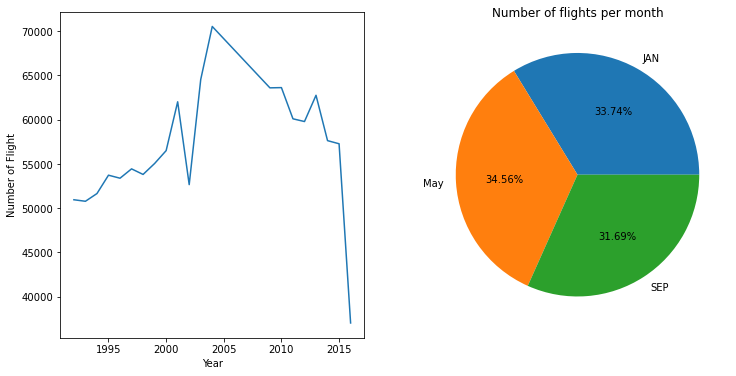

In [54]:
fig, (ax1, ax2)=plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
ax1.plot(flight_year['FLIGHTDATE'], flight_year['NUMBEROFPFLIGHT'])
ax1.set(xlabel='Year', ylabel='Number of Flight')

ax2.pie(flight_month['NUMBEROFPFLIGHT'], labels=['JAN', 'May', 'SEP'], autopct='%.2f%%')
ax2.set(title='Number of flights per month');

In [55]:
#Number of flights, ACTUALELAPSEDTIME, DISTANCE per airline
df1=new_df.groupby('AIRLINENAME')['TRANSACTIONID'].agg('count').reset_index()
df1.rename(columns={'TRANSACTIONID': "NUMBEROFPFLIGHTs"}, inplace=True)
df2=new_df.groupby('AIRLINENAME')['ACTUALELAPSEDTIME'].agg('sum').reset_index()
df3=new_df.groupby('AIRLINENAME')['DISTANCE'].agg('sum').reset_index()

df4=pd.merge(df1, df2, on='AIRLINENAME')
flight_airline=pd.merge(df3, df4, on='AIRLINENAME')

In [56]:
flight_airline.sort_values(by='NUMBEROFPFLIGHTs').set_index('AIRLINENAME')

,DISTANCE,NUMBEROFPFLIGHTs,ACTUALELAPSEDTIME
AIRLINENAME,,,
Aloha Airlines Inc.: AQ,147155,645,30048.00
ATA Airlines d/b/a ATA: TZ,1592613,1420,243147.05
Spirit Air Lines: NK,2014568,2070,316232.50
Virgin America: VX,3983087,2728,575225.93
Independence Air: DH,2055549,5750,466685.98
Hawaiian Airlines Inc.: HA,3412828,5977,552122.34
Frontier Airlines Inc.: F9,5884748,6436,937494.60
Comair Inc.: OH (1),3196281,6668,661878.45
Endeavor Air Inc.: 9E,3343906,8085,732754.20


In [57]:
#number of flights per original state
flight_state=new_df.groupby('ORIGINSTATENAME')['TRANSACTIONID'].agg('count').reset_index()
flight_state.rename(columns={'TRANSACTIONID': "NUMBEROFPFLIGHTs"}, inplace=True)
flight_state

,ORIGINSTATENAME,NUMBEROFPFLIGHTs
0,Alabama,7011
1,Alaska,8111
2,Arizona,39024
3,Arkansas,4763
4,California,141852
5,Colorado,39422
6,Connecticut,5655
7,Delaware,5
8,Florida,78338
9,Georgia,67182


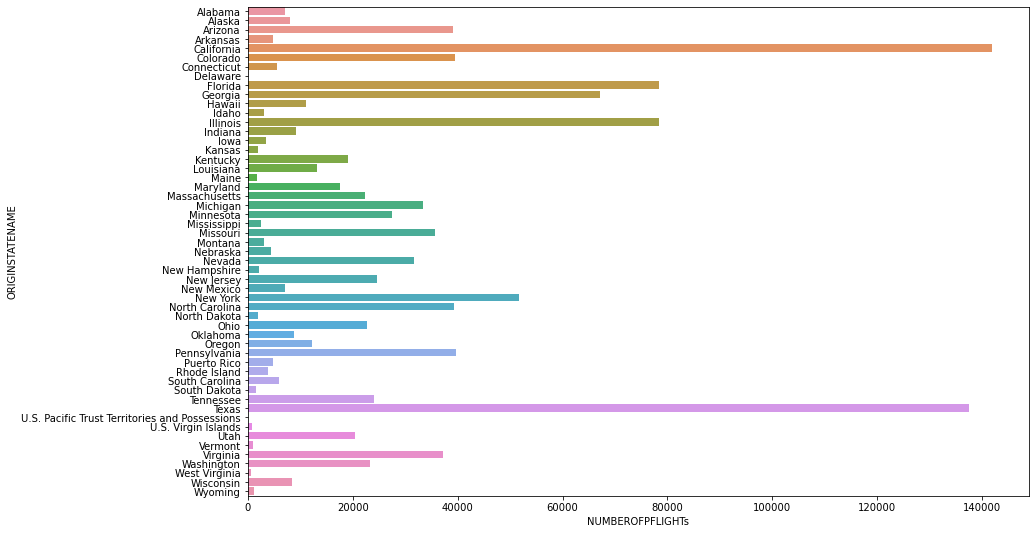

In [58]:
plt.figure(figsize=(14, 9))
sns.barplot(data=flight_state, y='ORIGINSTATENAME', x='NUMBEROFPFLIGHTs');

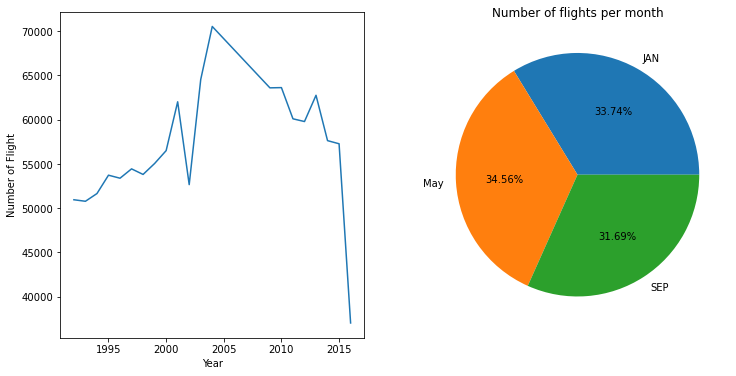

In [59]:
# arrival status and departure status
fig, (ax1, ax2)=plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
ax1.plot(flight_year['FLIGHTDATE'], flight_year['NUMBEROFPFLIGHT'])
ax1.set(xlabel='Year', ylabel='Number of Flight')

ax2.pie(flight_month['NUMBEROFPFLIGHT'], labels=['JAN', 'May', 'SEP'], autopct='%.2f%%')
ax2.set(title='Number of flights per month');

In [60]:
arrival_status=new_df.groupby('ARRSTATUS')['TRANSACTIONID'].agg('count').reset_index()
arrival_status.rename(columns={'TRANSACTIONID':'count'}, inplace=True)
arrival_status

,ARRSTATUS,count
0,a bit late,1068872
1,cancelled,28614
2,on time,43625
3,very late,50694


In [61]:
departure_status=new_df.groupby('DEPSTATUS')['TRANSACTIONID'].agg('count').reset_index()
departure_status.rename(columns={'TRANSACTIONID':'count'}, inplace=True)
departure_status

,DEPSTATUS,count
0,a bit late,929239
1,cancelled,28614
2,on time,187365
3,very late,46587


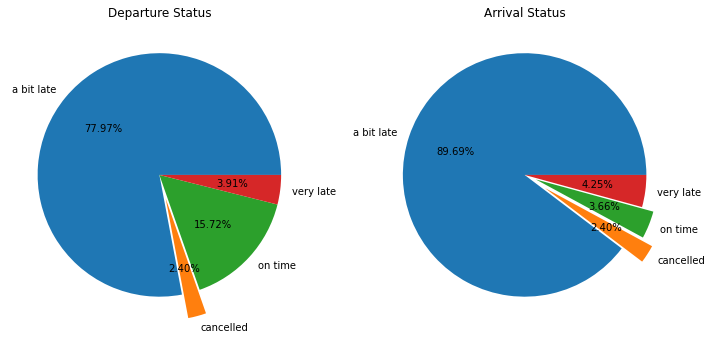

In [62]:
fig, (ax1, ax2)=plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
ax1.pie(departure_status['count'], labels=list(departure_status['DEPSTATUS']), autopct='%.2f%%', explode=[0.0, 0.2, 0.0, 0.0])
ax1.set(title='Departure Status')

ax2.pie(arrival_status['count'], labels=list(arrival_status['ARRSTATUS']), autopct='%.2f%%', explode=[0.0, 0.2, 0.1, 0.0])
ax2.set(title='Arrival Status');